__Mathematical Transformation__
- Apply maths formula in the data

- Log transform
- Reciprocal transform 
- Power transform
- Box - cox transform 
- U jonshon transform

__Mathematical Transformation in ML (Simple Explanation)__

Mathematical Transformations are methods used to modify the scale, distribution, or structure of data so that machine learning models can understand it better.

They help in:

Making data more normal (Gaussian)

Reducing skewness

Handling outliers

Making features comparable

Improving training stability

## 💡 Summary (Super Simple)

Mathematical transformations are used because they:

- ✔ **Make data clean**
- ✔ **Make data smooth**
- ✔ **Make data comparable**
- ✔ **Remove skewness**
- ✔ **Reduce outliers**
- ✔ **Help models learn faster**
- ✔ **Increase accuracy**


__How to find data is normal or not ?__
- sns.displot
- pd.skew()
- QQplot

### 🔹 Log Transformation Summary

- Used to reduce right skewness  
- Helps control large values and outliers  
- Makes data more normal  
- Formula: log(x + 1)  
- Not suitable for negative values  
- it improve the linear data

### 🔹 Reciprocal Transformation

- Formula: 1 / x  
- Strongly reduces large values  
- Helps fix right-skewness  
- Useful for features like speed, rates, reaction times  
- Cannot be used when values include 0 or negative numbers  


### 🔹 Square Transformation

- Formula: x²  
- Increases spread of data  
- Highlights differences between values  
- Makes data more nonlinear  
- Useful in polynomial regression and feature engineering  
- Not suitable when trying to reduce skewness  


### 🔹 Square Root Transformation (Sqrt Transform)

- Formula: √x  
- Reduces moderate right-skewness  
- Less aggressive than log transform  
- Works well for count data  
- Cannot be used on negative values  


In [1]:
import pandas as pd
import numpy as np 

In [2]:
import scipy.stats as stats

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [6]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [11]:
df = pd.read_csv(r'C:\Users\Lenovo\Krishnaraj singh\Code\newml\Documents!.0\train.csv',usecols=['Age','Fare','Survived'])

In [12]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [13]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [19]:
df.fillna(df['Age'].mean(),inplace=True)

In [20]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [21]:
df

,Survived,Age,Fare
0,0,22.000000,7.2500
1,1,38.000000,71.2833
2,1,26.000000,7.9250
3,1,35.000000,53.1000
4,0,35.000000,8.0500
...,...,...,...
886,0,27.000000,13.0000
887,1,19.000000,30.0000
888,0,29.699118,23.4500
889,1,26.000000,30.0000


In [22]:
x = df.iloc[:,1:3]
y = df.iloc[:,0]

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

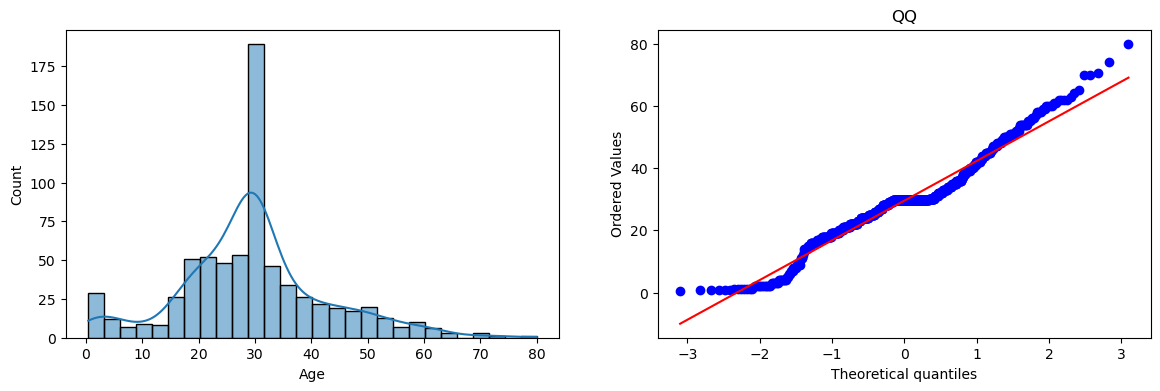

In [37]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.histplot(x_train['Age'], kde=True)

plt.subplot(122)
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title('QQ')



plt.show()

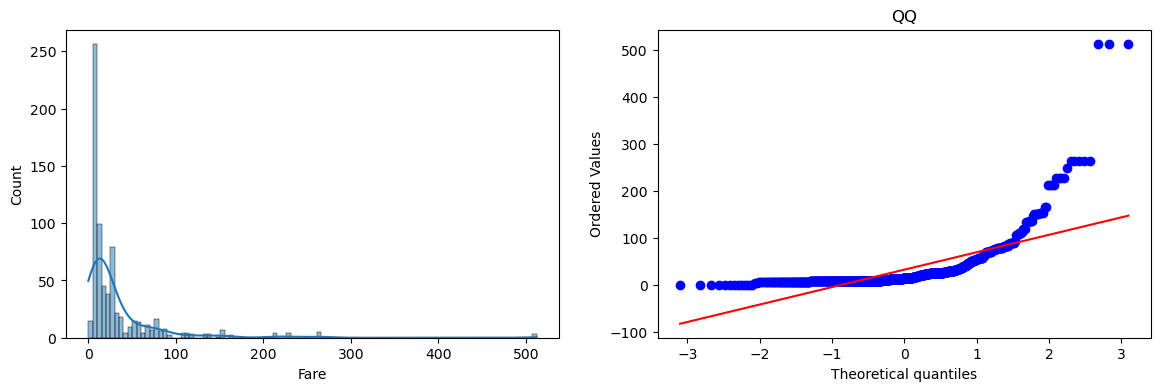

In [38]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.histplot(x_train['Fare'], kde=True)

plt.subplot(122)
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.title('QQ')



plt.show()


In [39]:
clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

In [41]:
clf.fit(x_train,y_train)
clf1.fit(x_train,y_train)

DecisionTreeClassifier()

In [42]:
y_pred = clf.predict(x_test)
y_pred1 = clf1.predict(x_test)

In [44]:
print('accuracy_score of LR - ',accuracy_score(y_test,y_pred))
print('accuracy_score of DT - ',accuracy_score(y_test,y_pred1))

accuracy_score of LR -  0.6480446927374302
accuracy_score of DT -  0.6759776536312849


__Call function transformer as log__

In [46]:
trf = FunctionTransformer(func=np.log1p)

In [47]:
x_train_transform = trf.fit_transform(x_train)
x_test_transform = trf.fit_transform(x_test)

In [53]:
clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

In [54]:
clf.fit(x_train_transform,y_train)
clf1.fit(x_train_transform,y_train)

DecisionTreeClassifier()

In [57]:
y_pred = clf.predict(x_test_transform)
y_pred1 = clf1.predict(x_test_transform)

In [58]:
print('accuracy_score LR',accuracy_score(y_test,y_pred))
print('accuracy_score DT',accuracy_score(y_test,y_pred1))

accuracy_score LR 0.6815642458100558
accuracy_score DT 0.6703910614525139


In [59]:
x_transform = trf.fit_transform(x)

print('LR ',np.mean(cross_val_score(clf,x_transform,y,scoring='accuracy',cv=10)))
print('DT ',np.mean(cross_val_score(clf1,x_transform,y,scoring='accuracy',cv=10)))

LR  0.678027465667915
DT  0.6599875156054931


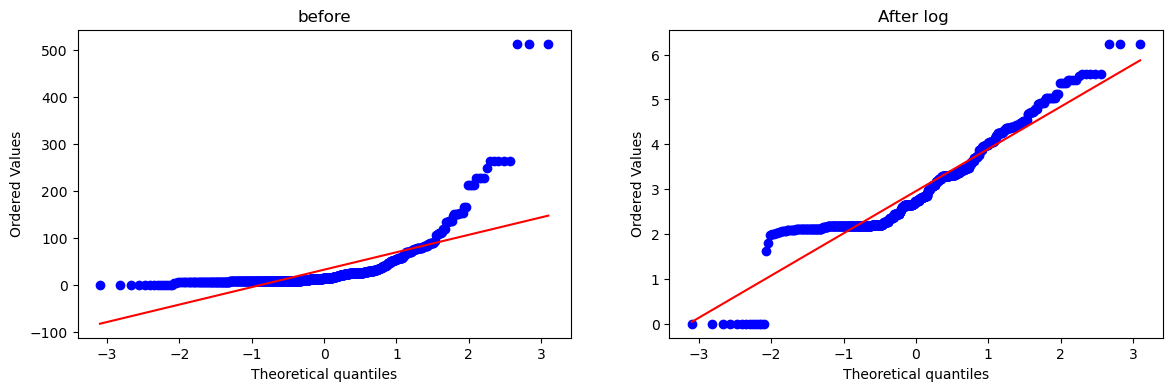

In [66]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Fare'],dist='norm', plot=plt)
plt.title('before')

plt.subplot(122)
stats.probplot(x_train_transform['Fare'],dist='norm',plot=plt)
plt.title('After log ')



plt.show()


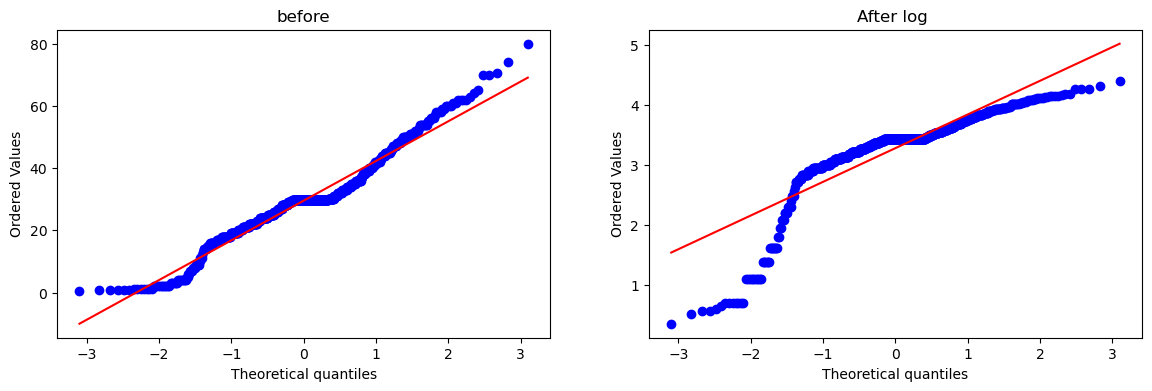

In [67]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Age'],dist='norm', plot=plt)
plt.title('before')

plt.subplot(122)
stats.probplot(x_train_transform['Age'],dist='norm',plot=plt)
plt.title('After log ')



plt.show()


__Fair to shi ho gya but age wala bigad gya h is log wale transform se bc yr right skewed nhi tha__

In [69]:
trf1 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

x_train_transform1 = trf1.fit_transform(x_train)
x_test_transform1 = trf1.transform(x_test)

In [70]:
clf.fit(x_train_transform1,y_train)
clf1.fit(x_train_transform1,y_train)

y_pred = clf.predict(x_test_transform1)
y_pred1 = clf1.predict(x_test_transform1)

print('accuracy_score LR',accuracy_score(y_test,y_pred))
print('accuracy_score DT',accuracy_score(y_test,y_pred1))

accuracy_score LR 0.6703910614525139
accuracy_score DT 0.664804469273743


In [71]:
x_transform1 = trf.fit_transform(x)

print('LR ',np.mean(cross_val_score(clf,x_transform1,y,scoring='accuracy',cv=10)))
print('DT ',np.mean(cross_val_score(clf1,x_transform1,y,scoring='accuracy',cv=10)))

LR  0.678027465667915
DT  0.658876404494382


In [72]:
def apply_transform(transform):
    x = x = df.iloc[:,1:3]
    y = df.iloc[:,0]

    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')

    x_trans = trf.fit_transform(x)

    clf = LogisticRegression()

    print("Accuracy  - ",np.mean(cross_val_score(clf,x_trans,y,scoring='accuracy',cv=10)))

    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(x_train['Age'],dist='norm', plot=plt)
    plt.title('before')

    plt.subplot(122)
    stats.probplot(x_train_transform['Age'],dist='norm',plot=plt)
    plt.title('After log ')



    plt.show()

Accuracy  -  0.6431335830212235


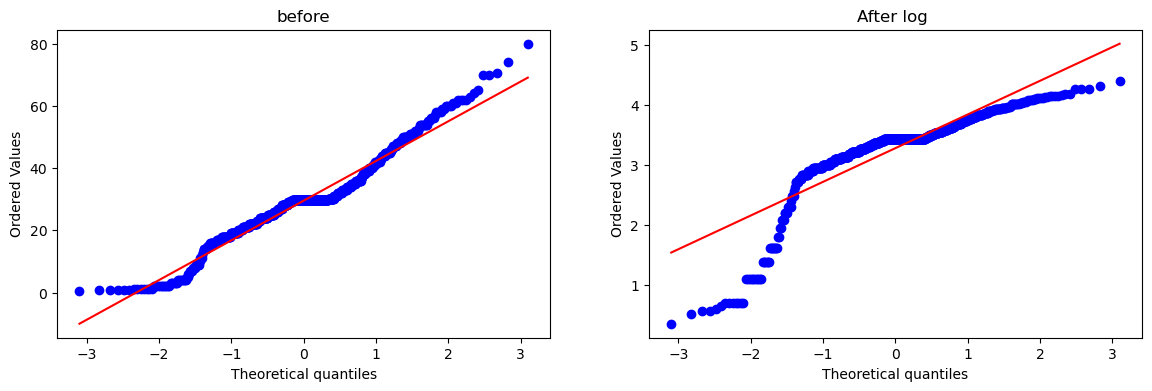

In [73]:
apply_transform(lambda x:x**2)

Accuracy  -  0.61729088639201


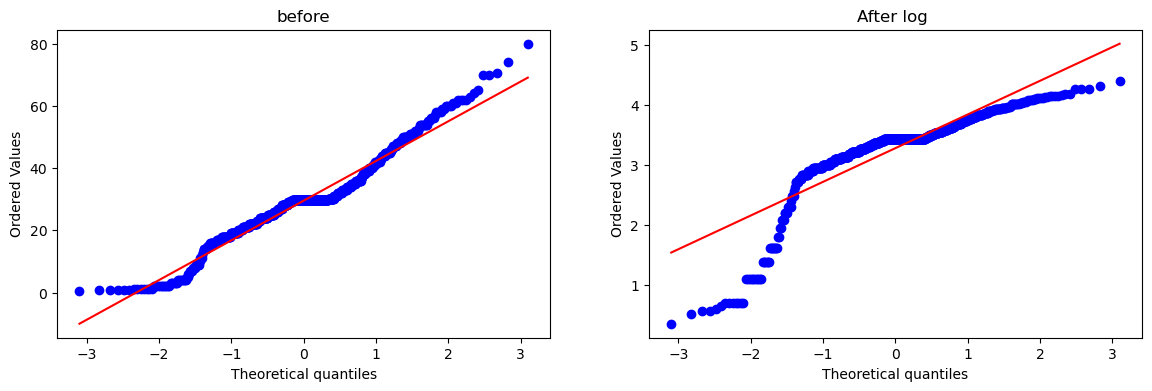

In [75]:

apply_transform(lambda x:1/(x+00000000.1))

Accuracy  -  0.6589013732833957


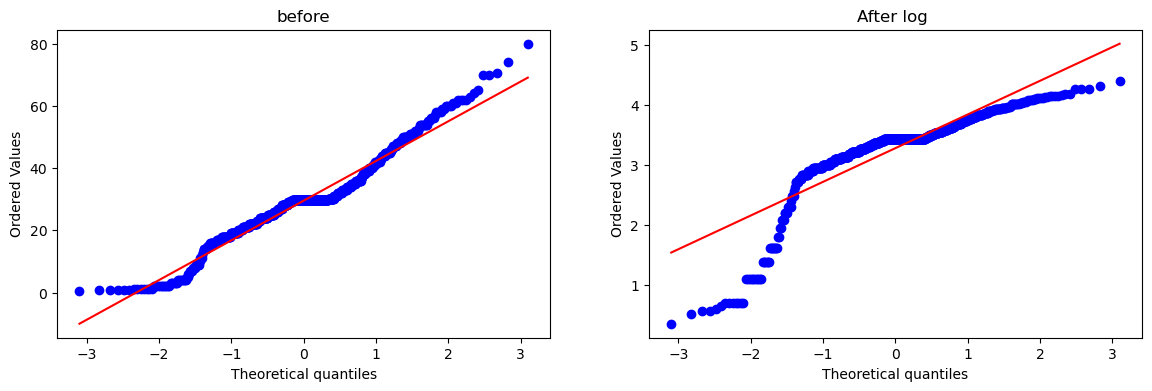

In [76]:

apply_transform(lambda x:x**1/2)